In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
#Import files
X = pd.read_csv("/Users/Hookay/Desktop/Weka/Road signs/dataprep/Python/x_train_gr_smpl.csv")
Y = pd.read_csv("/Users/Hookay/Desktop/Weka/Road signs/dataprep/Python/y_train_smpl.csv")

In [3]:
#shuffle the files in the same order
shuffle(X, random_state = 30)
shuffle(Y, random_state = 30)

,0
8219,5
533,1
7844,4
1105,1
7550,4
...,...
4859,3
919,1
500,1
4517,2


In [4]:
#normalise the data
Xn = preprocessing.normalize(X)

In [5]:
#make sure Y is in a row 
Y=np.ravel(Y)

In [6]:
#create the train and test data
X_train, X_test, y_train, y_test = train_test_split(Xn, Y, test_size=.3, random_state=30)

Accuracy: 0.36635706914344685
Recall: [0.64       0.21502209 0.30421217 0.4248366  0.53420195 0.75384615
 0.26530612 0.15151515 0.34640523 0.37804878]
Precision: [0.08311688 0.49829352 0.42951542 0.35583942 0.41414141 0.245
 0.49056604 0.27027027 0.62352941 0.51666667]
[[ 32   7   3   6   2   0   0   0   0   0]
 [192 146 129  75 116   5   3   0   4   9]
 [ 78  61 195  91 197   7   3   0   4   5]
 [ 22  32  47 195 148   2   8   2   2   1]
 [ 52  42  79  99 328   4   3   1   0   6]
 [  0   0   0   4   0  49   4   3   4   1]
 [  5   1   0  24   0  36  26   4   1   1]
 [  0   0   0  14   0  25   1  10  13   3]
 [  4   3   0  14   0  55   4  17  53   3]
 [  0   1   1  26   1  17   1   0   4  31]]

 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


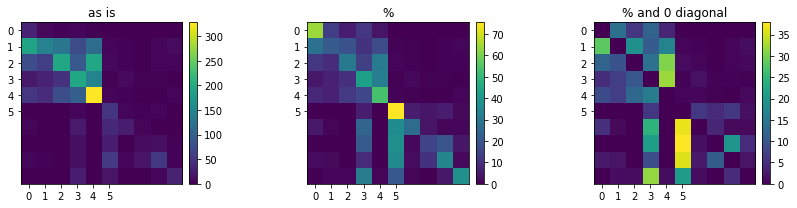

In [8]:
#Test original normalised data with Gaussian NB
y_expect = y_test
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
# run NB - Gaussian
GausNB = GaussianNB()
GausNB.fit(X_train, y_train)
y_predG = GausNB.predict(X_test)

#Accuracy
print("Accuracy:",accuracy_score(y_expect, y_predG))

# Recall
from sklearn.metrics import recall_score
print("Recall:",recall_score(y_expect, y_predG, average=None))

# Precision
from sklearn.metrics import precision_score
print("Precision:",precision_score(y_expect, y_predG, average=None))

#Confusion matrix
from sklearn.metrics import confusion_matrix
print( confusion_matrix(y_expect, y_predG))
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
cmx= confusion_matrix(y_expect, y_predG)
from mpl_toolkits.axes_grid1 import make_axes_locatable


def plot_confusion_matrix(cmx, vmax1=None, vmax2=None, vmax3=None):
    cmx_norm = 100*cmx / cmx.sum(axis=1, keepdims=True)
    cmx_zero_diag = cmx_norm.copy()
 
    np.fill_diagonal(cmx_zero_diag, 0)
 
    fig, ax = plt.subplots(ncols=3)
    fig.set_size_inches(12, 3)
    [a.set_xticks(range(6)) for a in ax]
    [a.set_yticks(range(6)) for a in ax]
 
    im1 = ax[0].imshow(cmx, vmax=vmax1)
    ax[0].set_title('as is')
    im2 = ax[1].imshow(cmx_norm, vmax=vmax2)
    ax[1].set_title('%')
    im3 = ax[2].imshow(cmx_zero_diag, vmax=vmax3)
    ax[2].set_title('% and 0 diagonal')
 
    dividers = [make_axes_locatable(a) for a in ax]
    cax1, cax2, cax3 = [divider.append_axes("right", size="5%", pad=0.1)
                        for divider in dividers]
 
    fig.colorbar(im1, cax=cax1)
    fig.colorbar(im2, cax=cax2)
    fig.colorbar(im3, cax=cax3)
    fig.tight_layout()
 
plot_confusion_matrix(cmx)
 
# the types appear in this order
print('\n', sorted(np.unique(y_expect)))

In [9]:
#Create the three data set based on the finding of correlation top 5, 10, 20
five = X[['580','581','582','629','747','793','792','794','795','796','841','842','935','981','982','983','1029','1030','1031','1077','1078','1086','1122','1134','1176','1215','1216','1218','1219','1224','1263','1264','1265','1266','1313','1314','1315','1320','1362','1564','1612']]

ten = X[['533','532','579','580','581','582','628','629','699','744','745','746','747','793','792','794','795','796','841','842','934','935','981','982','983','1029','1030','1031','1038','1077','1078','1086','1087','1122','1123','1128','1134','1135','1167','1168','1171','1172','1176','1182','1215','1216','1217','1218','1219','1221','1224','1263','1264','1265','1266','1272','1311','1312','1313','1314','1315','1320','1321','1361','1362','1366','1409','1410','1414','1461','1561','1562','1564', '1610','1612','2095','2096','2138','2139','2140']] 

twenty = X[['435','436','482','483','484','485','531','532','533','534','579','580','581','582','627','628','629','675','698','699','700','743','744','745','746','747','748','791','792','793','794','795','796', '840','841','842','934','935','981','982','983','1021','1029','1030','1031','1038','1043','1069','1077','1078','1085','1086','1087','1119','1120','1122','1123','1125','1128','1133','1134','1135','1167','1168','1170','1171','1172','1176','1181','1182','1183','1214','1215','1216','1217','1218','1219','1220','1221','1224','1230','1262','1263','1264','1265','1266','1267','1269','1272','1310','1311','1312','1313','1314','1315','1318','1320','1321','1360','1361','1362','1363','1366','1408','1409','1410','1413','1414','1457','1458','1461','1505','1506','1507','1508','1509','1510','1511', '1561','1562','1564', '1610','1612','2049','2050', '2078', '2094','2095', '2097','2096','2138','2139','2140', '2141', '2142', '2186', '2269','2270']]


In [10]:
#normalise data
fiven = preprocessing.normalize(five)
tenn =  preprocessing.normalize(ten)
twenty =  preprocessing.normalize(twenty)

In [11]:
#create train and test data fo each
fX_train, fX_test, fy_train, fy_test = train_test_split(fiven, Y, test_size=.29, random_state=17)
tX_train, tX_test, ty_train, ty_test = train_test_split(tenn, Y, test_size=.29, random_state=17)
wX_train, wX_test, wy_train, wy_test = train_test_split(twenty, Y, test_size=.29, random_state=17)

Accuracy: 0.6858769121309143
Recall: [0.54385965 0.7171875  0.77604977 0.69882353 0.64902998 0.84126984
 0.37288136 0.66666667 0.71974522 0.30952381]
Precision: [0.36046512 0.81964286 0.69305556 0.62133891 0.80701754 0.35810811
 0.59459459 0.56716418 0.64571429 0.55319149]
[[ 31   1   0   2  23   0   0   0   0   0]
 [  9 459  75  40  41   5   1   7   0   3]
 [  1  41 499  52  17  18   4   6   1   4]
 [  5   7  85 297   4  15   2   0   8   2]
 [ 40  51  44  41 368   6   1  13   1   2]
 [  0   0   5   2   0  53   1   0   0   2]
 [  0   0   8  13   1  18  44   0  33   1]
 [  0   0   1   6   0   8   3  38   0   1]
 [  0   1   2   9   1   8  14   3 113   6]
 [  0   0   1  16   1  17   4   0  19  26]]

 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


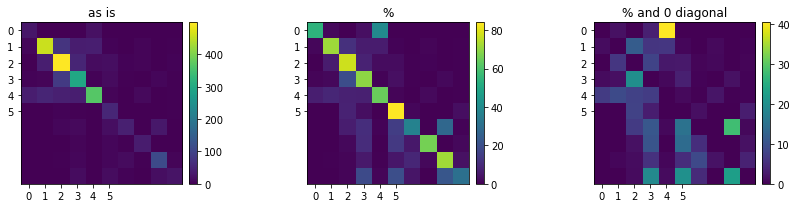

In [12]:
# Test top 5 normalised data with Gaussian

#Gaussian
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
fy_expect = fy_test
# run NB - Gaussian
GausNB = GaussianNB()
GausNB.fit(fX_train, fy_train)
fy_predG = GausNB.predict(fX_test)
#Accuracy
print("Accuracy:",accuracy_score(fy_expect, fy_predG))
# Recall
from sklearn.metrics import recall_score
print("Recall:",recall_score(fy_expect, fy_predG, average=None))
# Precision
from sklearn.metrics import precision_score
print("Precision:",precision_score(fy_expect, fy_predG, average=None))

#Confusion matrix
print( confusion_matrix(fy_expect, fy_predG))

cmx= confusion_matrix(fy_expect, fy_predG)

def plot_confusion_matrix(cmx, vmax1=None, vmax2=None, vmax3=None):
    cmx_norm = 100*cmx / cmx.sum(axis=1, keepdims=True)
    cmx_zero_diag = cmx_norm.copy()
 
    np.fill_diagonal(cmx_zero_diag, 0)
 
    fig, ax = plt.subplots(ncols=3)
    fig.set_size_inches(12, 3)
    [a.set_xticks(range(6)) for a in ax]
    [a.set_yticks(range(6)) for a in ax]
 
    im1 = ax[0].imshow(cmx, vmax=vmax1)
    ax[0].set_title('as is')
    im2 = ax[1].imshow(cmx_norm, vmax=vmax2)
    ax[1].set_title('%')
    im3 = ax[2].imshow(cmx_zero_diag, vmax=vmax3)
    ax[2].set_title('% and 0 diagonal')
 
    dividers = [make_axes_locatable(a) for a in ax]
    cax1, cax2, cax3 = [divider.append_axes("right", size="5%", pad=0.1)
                        for divider in dividers]
 
    fig.colorbar(im1, cax=cax1)
    fig.colorbar(im2, cax=cax2)
    fig.colorbar(im3, cax=cax3)
    fig.tight_layout()
 
plot_confusion_matrix(cmx)
 
# the types appear in this order
print('\n', sorted(np.unique(fy_expect)))

Accuracy: 0.6954820348630381
Recall: [0.68421053 0.740625   0.75272162 0.56       0.74779541 0.88888889
 0.49152542 0.68421053 0.7133758  0.36904762]
Precision: [0.41052632 0.83597884 0.68847795 0.56398104 0.82651072 0.40875912
 0.59793814 0.84782609 0.66272189 0.5       ]
[[ 39   3   1   3  11   0   0   0   0   0]
 [  1 474  59  44  48   8   1   1   0   4]
 [  1  51 484  57  23  14   7   1   2   3]
 [  8  16 138 238   5   7   6   0   3   4]
 [ 46  21   5  41 424  22   1   3   0   4]
 [  0   0   4   0   1  56   0   1   0   1]
 [  0   0   8  15   0  14  58   0  20   3]
 [  0   0   1   5   0  10   1  39   0   1]
 [  0   2   3   7   0   6  15   1 112  11]
 [  0   0   0  12   1   0   8   0  32  31]]

 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


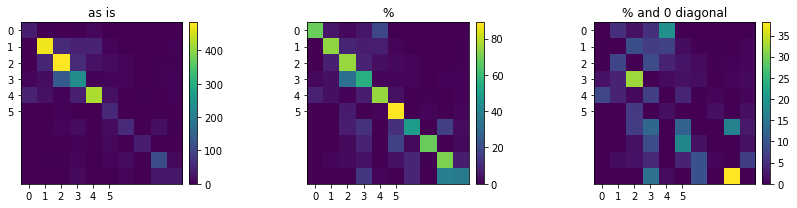

In [14]:
# Test top 10 normalised data with Gaussian

#Gaussian
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
ty_expect = ty_test
# run NB - Gaussian
GausNB = GaussianNB()
GausNB.fit(tX_train, ty_train)
ty_predG = GausNB.predict(tX_test)
#Accuracy
print("Accuracy:",accuracy_score(ty_expect, ty_predG))
# Recall
from sklearn.metrics import recall_score
print("Recall:",recall_score(ty_expect, ty_predG, average=None))
# Precision
from sklearn.metrics import precision_score
print("Precision:",precision_score(ty_expect, ty_predG, average=None))

#Confusion matrix
print( confusion_matrix(ty_expect, ty_predG))

cmx= confusion_matrix(ty_expect, ty_predG)

def plot_confusion_matrix(cmx, vmax1=None, vmax2=None, vmax3=None):
    cmx_norm = 100*cmx / cmx.sum(axis=1, keepdims=True)
    cmx_zero_diag = cmx_norm.copy()
 
    np.fill_diagonal(cmx_zero_diag, 0)
 
    fig, ax = plt.subplots(ncols=3)
    fig.set_size_inches(12, 3)
    [a.set_xticks(range(6)) for a in ax]
    [a.set_yticks(range(6)) for a in ax]
 
    im1 = ax[0].imshow(cmx, vmax=vmax1)
    ax[0].set_title('as is')
    im2 = ax[1].imshow(cmx_norm, vmax=vmax2)
    ax[1].set_title('%')
    im3 = ax[2].imshow(cmx_zero_diag, vmax=vmax3)
    ax[2].set_title('% and 0 diagonal')
 
    dividers = [make_axes_locatable(a) for a in ax]
    cax1, cax2, cax3 = [divider.append_axes("right", size="5%", pad=0.1)
                        for divider in dividers]
 
    fig.colorbar(im1, cax=cax1)
    fig.colorbar(im2, cax=cax2)
    fig.colorbar(im3, cax=cax3)
    fig.tight_layout()
 
plot_confusion_matrix(cmx)
 
# the types appear in this order
print('\n', sorted(np.unique(ty_expect)))

Accuracy: 0.6527926004980434
Recall: [0.73684211 0.71875    0.67807154 0.47764706 0.72663139 0.96825397
 0.33050847 0.68421053 0.68789809 0.41666667]
Precision: [0.46153846 0.79861111 0.66871166 0.47764706 0.74234234 0.44202899
 0.609375   0.86666667 0.58064516 0.44303797]
[[ 42   5   1   3   6   0   0   0   0   0]
 [  1 460  35  51  70   6   0   3   4  10]
 [  0  55 436  76  53  12   3   1   3   4]
 [  8  18 162 203  14   3   2   1   8   6]
 [ 40  34   7  48 412  14   2   1   6   3]
 [  0   0   0   0   0  61   1   0   0   1]
 [  0   0   9  23   0  14  39   0  30   3]
 [  0   0   0   4   0  12   1  39   0   1]
 [  0   2   2   4   0  11  14   0 108  16]
 [  0   2   0  13   0   5   2   0  27  35]]

 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


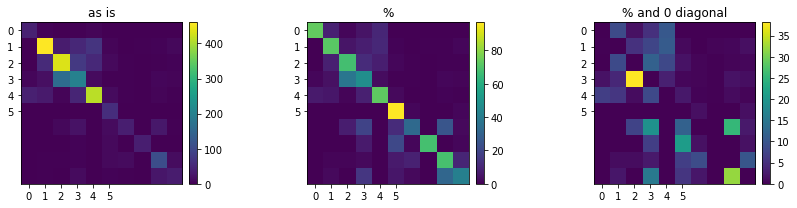

In [15]:
# Test top 5 normalised data with Gaussian

#Gaussian
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
wy_expect = wy_test
# run NB - Gaussian
GausNB = GaussianNB()
GausNB.fit(wX_train, wy_train)
wy_predG = GausNB.predict(wX_test)
#Accuracy
print("Accuracy:",accuracy_score(wy_expect, wy_predG))
# Recall
from sklearn.metrics import recall_score
print("Recall:",recall_score(wy_expect, wy_predG, average=None))
# Precision
from sklearn.metrics import precision_score
print("Precision:",precision_score(wy_expect, wy_predG, average=None))

#Confusion matrix
print( confusion_matrix(wy_expect, wy_predG))

cmx= confusion_matrix(wy_expect, wy_predG)

def plot_confusion_matrix(cmx, vmax1=None, vmax2=None, vmax3=None):
    cmx_norm = 100*cmx / cmx.sum(axis=1, keepdims=True)
    cmx_zero_diag = cmx_norm.copy()
 
    np.fill_diagonal(cmx_zero_diag, 0)
 
    fig, ax = plt.subplots(ncols=3)
    fig.set_size_inches(12, 3)
    [a.set_xticks(range(6)) for a in ax]
    [a.set_yticks(range(6)) for a in ax]
 
    im1 = ax[0].imshow(cmx, vmax=vmax1)
    ax[0].set_title('as is')
    im2 = ax[1].imshow(cmx_norm, vmax=vmax2)
    ax[1].set_title('%')
    im3 = ax[2].imshow(cmx_zero_diag, vmax=vmax3)
    ax[2].set_title('% and 0 diagonal')
 
    dividers = [make_axes_locatable(a) for a in ax]
    cax1, cax2, cax3 = [divider.append_axes("right", size="5%", pad=0.1)
                        for divider in dividers]
 
    fig.colorbar(im1, cax=cax1)
    fig.colorbar(im2, cax=cax2)
    fig.colorbar(im3, cax=cax3)
    fig.tight_layout()
 
plot_confusion_matrix(cmx)
 
# the types appear in this order
print('\n', sorted(np.unique(wy_expect)))